In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/diabetes.csv")

In [3]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
ypred=model.predict(xtest)

Accuracy is : 0.8246753246753247
[[98  9]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



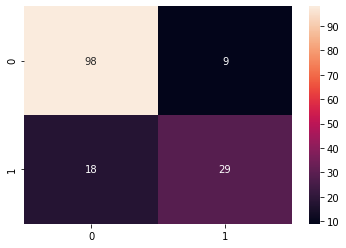

In [7]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is :",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

### Tuning of Hyperparameter
Logistic regression does not really have any critical hyperparameters to tune.


solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]

Regularization (penalty) can sometimes be helpful.

penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.

C in [100, 10, 1.0, 0.1, 0.01]


### Logistic Regression Parameters are solver,C,penalty

In [11]:
#model 
model=LogisticRegression()
#Parameters
penalty =['l1', 'l2', 'elasticnet']
C=[10,1,0.1,0.001,0.0001]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#grid 
grid=dict(solver=solver,C=C,penalty=penalty)
#cv 
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
#Grid Search cv
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring="accuracy",error_score=0)
result=gridcv.fit(x,y)
print(result.best_score_)
print(result.best_params_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_sel

0.7742652084757348
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_s

In [14]:
pd.DataFrame(result.cv_results_) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000799,0.000872,0.000000,0.000000,10,l1,newton-cg,"{'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
1,0.000696,0.000522,0.000000,0.000000,10,l1,lbfgs,"{'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
2,0.010075,0.003056,0.001800,0.000701,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.740260,0.792208,...,0.753247,0.844156,0.766234,0.792208,0.740260,0.789474,0.802632,0.772101,0.042257,7
3,0.000631,0.000481,0.000000,0.000000,10,l1,sag,"{'C': 10, 'penalty': 'l1', 'solver': 'sag'}",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
4,0.021011,0.008863,0.003289,0.004275,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.675325,0.714286,...,0.584416,0.740260,0.662338,0.662338,0.714286,0.697368,0.710526,0.675325,0.042215,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000630,0.000480,0.000000,0.000000,0.0001,elasticnet,newton-cg,"{'C': 0.0001, 'penalty': 'elasticnet', 'solver...",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
71,0.000664,0.000470,0.000000,0.000000,0.0001,elasticnet,lbfgs,"{'C': 0.0001, 'penalty': 'elasticnet', 'solver...",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
72,0.000600,0.000490,0.000000,0.000000,0.0001,elasticnet,liblinear,"{'C': 0.0001, 'penalty': 'elasticnet', 'solver...",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
73,0.000765,0.000492,0.000000,0.000000,0.0001,elasticnet,sag,"{'C': 0.0001, 'penalty': 'elasticnet', 'solver...",0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36


In [15]:
print(result.best_score_)
print(result.best_params_)

0.7742652084757348
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
model=LogisticRegression(C= 10, penalty= 'l2', solver='liblinear')
model.fit(xtrain,ytrain)

LogisticRegression(C=10, solver='liblinear')

In [20]:
ypred=model.predict(xtest)

Accuracy is : 0.8246753246753247
[[98  9]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



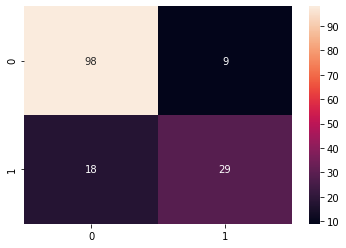

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is :",acc)
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))